# Analysis of a NOAA weather dataset ###

In this notebook we are analyzing a sample out of data that was downloaded from http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/, the main file is ghcnd_all.tar.gz which is about 2.4 GB which becomes around 20GB when uncompressed.

The data contains about 1 million station-year recordings. That is too much to analyzer on single core machine, so we start by taking a sample of 20,000 recordings of the maximal daily temperatures for a period of a 365 days starting on January 1st (the last day of leap years is discarded).

## Checking the versions of some important packages ###

In [11]:
import pandas as pd
import numpy as np
import sklearn as sk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Circle', 'select', 'random', 'Rectangle', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__
print 'sklearn version:',sk.__version__
print 'matplotlib version:', matplotlib.__version__

pandas version:  0.20.1
numpy version: 1.13.3
sklearn version: 0.18.1
matplotlib version: 2.1.0


In [13]:
#if a version of a module is too old, you can use the following command to update it
#!pip install --upgrade matplotlib

## Data loading and analysis
Switch to the data directory and check it's contents

In [14]:
%cd ../data/weather
!ls -lh

[Errno 2] No such file or directory: '../data/weather'
/Users/tushar/Desktop/dse200/DSE200-notebooks/data/weather
total 159696
-rw-r--r--  1 tushar  staff   839K Sep 21 10:18 ALL.corrupted.csv
-rw-r--r--  1 tushar  staff   839K Sep 21 10:18 ALL.head.csv
-rw-r--r--  1 tushar  staff    25M Sep 21 10:18 SAMPLE_TMAX.csv
-rw-r--r--  1 tushar  staff    13K Sep 21 10:18 TMAX.10.csv
-rw-r--r--  1 tushar  staff     0B Sep 21 10:18 TMAX.head.csv
-rw-r--r--  1 tushar  staff   218B Sep 21 10:18 data-source.txt
-rw-r--r--  1 tushar  staff    22K Sep 21 10:18 ghcnd-readme.txt
-rw-r--r--  1 tushar  staff   7.0M Sep 21 10:18 ghcnd-stations.txt
-rw-r--r--  1 tushar  staff   7.4M Oct 26 04:37 ghcnd-stations_buffered.txt
-rw-r--r--  1 tushar  staff   270B Sep 21 10:18 ghcnd-version.txt
-rw-r--r--  1 tushar  staff    37M Sep 21 10:18 make_covar.raw_256


In [15]:
!cat data-source.txt

I got the data from this ftp site:

ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/

Opening the ftp site in a browser is helpful: you can easily browse the directory structure and look at txt and
pdf files.

Yoav Freund


### The main files
- *data-source.txt* - information about downloading the data from NOAA
- *ghcnd-readme.txt* - A readme file describing the content of all of the files from ghcnd, in particular:
- *ghcnd-stations.txt* - information about each of the meteorological stations.
- *Sample_TMAX* - a file with 10,000 randomly selected one-year-long TMAX measurements

In [16]:
# read a single line in the data file
file=open('SAMPLE_TMAX.csv','r')
for line in file.readlines():
    print line
    print len(line.split(','))
    break

USC00507570,TMAX,2005,67,44,61,17,-17,-22,-39,-44,-44,-78,-156,-156,-33,28,39,22,-89,-139,-156,44,61,50,-39,17,67,61,-61,-61,11,33,-72,-100,-150,-178,-150,-33,39,28,22,11,-150,-156,-150,50,44,28,39,50,56,39,67,50,39,56,50,56,44,22,6,17,17,61,83,67,67,89,78,61,61,83,56,44,67,89,67,89,100,83,56,17,22,50,39,28,-6,28,-6,-28,-50,-44,-33,-22,-22,-22,17,67,67,78,94,89,72,56,89,111,94,83,56,11,28,56,89,133,133,128,178,167,194,211,189,178,161,172,144,133,128,117,183,200,211,211,178,172,133,150,128,133,150,150,178,211,200,133,172,144,161,156,139,150,133,144,161,150,161,200,183,228,222,183,144,150,178,167,183,239,239,267,244,222,222,117,189,233,194,206,261,228,211,222,261,228,228,200,194,183,233,244,217,267,250,217,161,200,200,194,250,261,222,194,183,161,206,228,228,222,206,200,167,183,194,172,200,189,167,183,194,200,206,217,206,244,267,256,278,294,278,256,228,228,189,206,211,211,161,156,144,156,161,156,167,139,122,144,139,156,150,144,128,144,128,150,150,133,144,172,156,106,161,161,122,122,133,11

### read data into a Pandas Dataframe ##
* Read the data into a DataFrame
* Read the data vectors in G
* Divide by 10.0 to get the temperatude in degrees celsius
* Replace values outside the range [-400,500]  ([-40,50] degrees celsius) with nan  
* Paste fixed matrix back into Dout
* Show the first few lines of DDout

In [17]:
#create an index that is a range of dates
#using 2001 which was not a leap year (2000 was)
days_index=pd.date_range('January 1, 2001', periods=365,freq='D')
days=list(days_index)
days[:2]

[Timestamp('2001-01-01 00:00:00', freq='D'),
 Timestamp('2001-01-02 00:00:00', freq='D')]

In [18]:
columns=['station','measurement','year']+days
Data = pd.read_csv('SAMPLE_TMAX.csv',header=None,names=columns)
Data.head()

station measurement  year  2001-01-01 00:00:00  2001-01-02 00:00:00  \
0  USC00507570        TMAX  2005                 67.0                 44.0   
1  NOE00135018        TMAX  1959                  NaN                  NaN   
2  KZ000036546        TMAX  1982                  NaN                  NaN   
3  USC00054664        TMAX  1964                  NaN                  NaN   
4  CUW00011706        TMAX  1981                300.0                283.0   

   2001-01-03 00:00:00  2001-01-04 00:00:00  2001-01-05 00:00:00  \
0                 61.0                 17.0                -17.0   
1                  NaN                  NaN                  NaN   
2               -139.0                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                300.0                300.0                283.0   

   2001-01-06 00:00:00  2001-01-07 00:00:00         ...           \
0                -22.0                -39.0         ...            
1                  NaN                  NaN         ...            
2                -45.0                  NaN         ...            
3                  NaN                  NaN         ...            
4                289.0                289.0         ...            

   2001-12-22 00:00:00  2001-12-23 00:00:00  2001-12-24 00:00:00  \
0                -39.0                -33.0                -17.0   
1                 58.0                 31.0                 45.0   
2                  NaN                -73.0                  NaN   
3                 94.0                 78.0                 33.0   
4                300.0                311.0                322.0   

   2001-12-25 00:00:00  2001-12-26 00:00:00  2001-12-27 00:00:00  \
0                 39.0                 61.0                 50.0   
1                 42.0                 32.0                 16.0   
2                  NaN                  NaN               -170.0   
3                  NaN                  NaN                 39.0   
4                311.0                311.0                322.0   

   2001-12-28 00:00:00  2001-12-29 00:00:00  2001-12-30 00:00:00  \
0                 61.0                 61.0                 44.0   
1                 20.0                 22.0                 39.0   
2               -166.0               -160.0               -135.0   
3                 56.0                -39.0               -150.0   
4                322.0                311.0                311.0   

   2001-12-31 00:00:00  
0                 61.0  
1                 61.0  
2                -99.0  
3               -150.0  
4                311.0  

[5 rows x 368 columns]

### Selecting rows and columns in a dataframe

* To select a set of columns from a dataframe:
```
DF[['column2','column6','column1']]
```
This returns a new dataframe containing the selected columns in the selected order.

* To select a set of rows based on a condition defined using one of the coluns:
```
DF[DF['column1']>5]
```

More sophisticated selections can be down using:
* `.loc` : select according to the **name** of the column or row.
* `.iloc` : select according to the **position** of the column or row.

Resources:
* [A tutorial on selecting rows and columns in a dataframe using iloc, loc and](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
* [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/raw/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (newer and better than the one in the folder).

In [19]:
# some data cleaning
G=Data.loc[:,days]
G[G<-400]=np.nan
G[G>500]=np.nan
G=G/10
Data.loc[:,days]=G
G=G.transpose()

shape(tmp)= (7300000,) type(tmp)= <class 'pandas.core.series.Series'>
min=-40.00,max=50.00


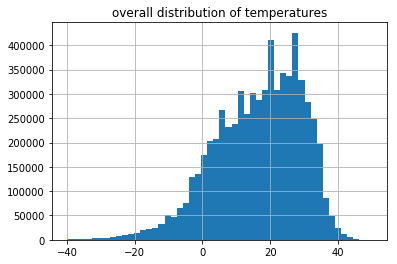

In [20]:
# compute the histogram
tmp=G.loc[:,:].unstack()
print 'shape(tmp)=',shape(tmp),'type(tmp)=',type(tmp)
tmp.hist(bins=50);
title('overall distribution of temperatures')
print 'min=%3.2f,max=%3.2f'%(tmp.min(),tmp.max())

## Plotting temperature as a function of day-of-year

### Script for plotting yearly plots ###

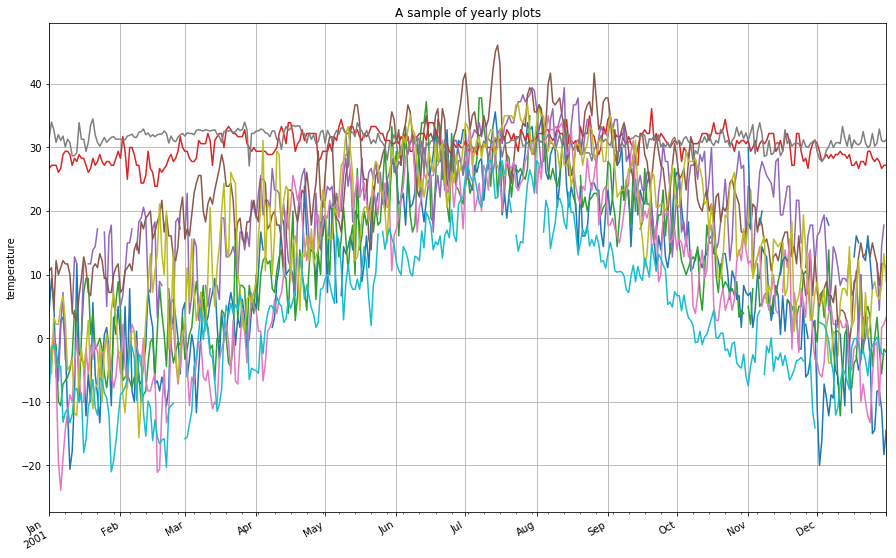

In [21]:
def YearlyPlots(T,ttl='',size=(15,10)):
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    T.set_index(days_index)
    T.plot(legend=False,figsize=size)
    # rotate and align the tick labels so they look better
    gcf().autofmt_xdate()
    ylabel('temperature')
    grid()
    title(ttl)
YearlyPlots(Data.loc[20:30, days].transpose(),ttl='A sample of yearly plots')

### Plots for sydney, Australia ###

['ASN00066124' 'ASN00066059' 'ASN00066194' 'ASN00066131' 'ASN00066195'
 'ASN00066062']
(368, 6)


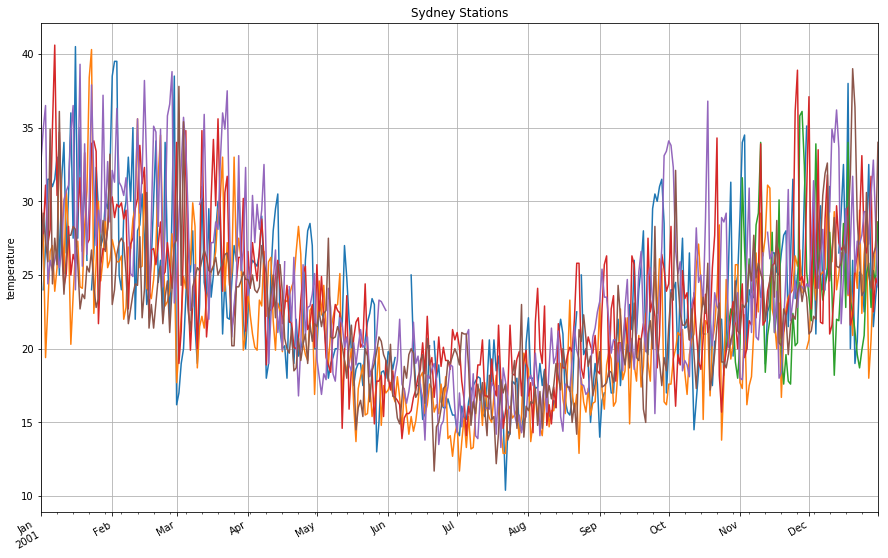

In [22]:
sydneyStations=['ASN00066' in station for station in Data['station']]
print Data[sydneyStations]['station'].values
tmp=Data[sydneyStations].transpose()
print shape(tmp)
YearlyPlots(tmp.loc[days,:],ttl='Sydney Stations')

## Computing statistics when there are missing values

### Computing mean and std for each station/year ###
And calculating the standard deviation for each year.

In [23]:
# a simple scale function to normalize the data-frame row-by-row
from numpy import mean, std
def Compute_mean_std(Din):
    matrix=Din.loc[:,days]
    Din['Mean']=mean(matrix, axis=1).values 
    Din['Std']=std(matrix, axis=1).values
    return Din

if 'measurement' in Data.columns:
    Data=Data.drop('measurement',axis=1)  # remove column that is the constant TMAX
Dout=Compute_mean_std(Data)
#reorder the columns
Dout=Dout[['station','year','Mean','Std']+days]
Dout.head()

station  year       Mean        Std  2001-01-01 00:00:00  \
0  USC00507570  2005   8.531507  10.439819                  6.7   
1  NOE00135018  1959  14.494545   7.974400                  NaN   
2  KZ000036546  1982   7.220513  14.897310                  NaN   
3  USC00054664  1964  18.576860  10.790115                  NaN   
4  CUW00011706  1981  31.321370   1.588618                 30.0   

   2001-01-02 00:00:00  2001-01-03 00:00:00  2001-01-04 00:00:00  \
0                  4.4                  6.1                  1.7   
1                  NaN                  NaN                  NaN   
2                  NaN                -13.9                  NaN   
3                  NaN                  NaN                  NaN   
4                 28.3                 30.0                 30.0   

   2001-01-05 00:00:00  2001-01-06 00:00:00         ...           \
0                 -1.7                 -2.2         ...            
1                  NaN                  NaN         ...            
2                  NaN                 -4.5         ...            
3                  NaN                  NaN         ...            
4                 28.3                 28.9         ...            

   2001-12-22 00:00:00  2001-12-23 00:00:00  2001-12-24 00:00:00  \
0                 -3.9                 -3.3                 -1.7   
1                  5.8                  3.1                  4.5   
2                  NaN                 -7.3                  NaN   
3                  9.4                  7.8                  3.3   
4                 30.0                 31.1                 32.2   

   2001-12-25 00:00:00  2001-12-26 00:00:00  2001-12-27 00:00:00  \
0                  3.9                  6.1                  5.0   
1                  4.2                  3.2                  1.6   
2                  NaN                  NaN                -17.0   
3                  NaN                  NaN                  3.9   
4                 31.1                 31.1                 32.2   

   2001-12-28 00:00:00  2001-12-29 00:00:00  2001-12-30 00:00:00  \
0                  6.1                  6.1                  4.4   
1                  2.0                  2.2                  3.9   
2                -16.6                -16.0                -13.5   
3                  5.6                 -3.9                -15.0   
4                 32.2                 31.1                 31.1   

   2001-12-31 00:00:00  
0                  6.1  
1                  6.1  
2                 -9.9  
3                -15.0  
4                 31.1  

[5 rows x 369 columns]

### Compute average temperature for each day of the year. ###

(365, 1)

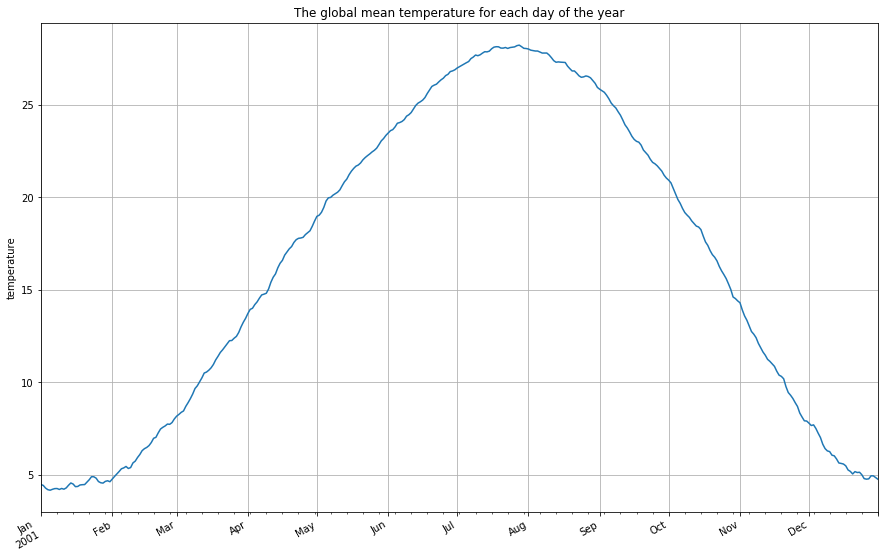

In [24]:
Mean=pd.DataFrame(mean(Dout.loc[:,days], axis=0)) 
YearlyPlots(Mean,ttl='The global mean temperature for each day of the year')
shape(Mean)

### Distribution of missing values
We find the distribution of missing values and decide how to deal with them. From the analysis below we see that most rows have some
missing values. We therefor choose to perform the average more carefully, rather than discard rows with many missing values

3760

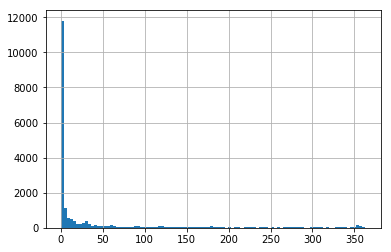

In [25]:
nan_per_row=sum(isnan(Dout.iloc[:,1:365]),axis=1) 
nan_per_row.hist(bins=100)
sum(nan_per_row>50)

### Computing the covariance matrix in a NaN-tolerant fashion
We compute the empirical covariance matrix in a way that tolerates small numbers of missing values.


In [26]:
sum(nan_per_row>50)

3760

In [27]:
max_nan=50

M=Dout.loc[:,days].transpose()
#M.drop(nan_per_row>0,axis=1,inplace=True)
M=M.loc[:,nan_per_row<max_nan]
Dout=Dout.loc[nan_per_row<max_nan,:]
Dout.index=range(shape(Dout)[0])
(columns,rows)=shape(M)
Mean=mean(M, axis=1).values

print (columns,rows), shape(Mean),shape(M),shape(Dout)
C=np.zeros([columns,columns])   # Sum
N=np.zeros([columns,columns])   # Counter of non-nan entries
Dout.head()

(365, 16217) (365,) (365, 16217) (16217, 369)


station  year       Mean        Std  2001-01-01 00:00:00  \
0  USC00507570  2005   8.531507  10.439819                  6.7   
1  CUW00011706  1981  31.321370   1.588618                 30.0   
2  SZ000002220  1994   2.395342   6.694865                 -5.8   
3  RSM00028275  1986   3.972877  14.084255                -11.4   
4  USC00488705  1982  12.107945  11.888948                  1.1   

   2001-01-02 00:00:00  2001-01-03 00:00:00  2001-01-04 00:00:00  \
0                  4.4                  6.1                  1.7   
1                 28.3                 30.0                 30.0   
2                 -2.8                 -1.7                 -5.0   
3                 -4.1                 -2.2                -15.0   
4                 -3.3                 -4.4                 -0.6   

   2001-01-05 00:00:00  2001-01-06 00:00:00         ...           \
0                 -1.7                 -2.2         ...            
1                 28.3                 28.9         ...            
2                 -6.1                 -3.9         ...            
3                -16.7                -11.3         ...            
4                 -2.2                -13.9         ...            

   2001-12-22 00:00:00  2001-12-23 00:00:00  2001-12-24 00:00:00  \
0                 -3.9                 -3.3                 -1.7   
1                 30.0                 31.1                 32.2   
2                -13.0                 -4.8                 -3.4   
3                -31.5                -28.2                -23.6   
4                  5.6                  6.1                  3.3   

   2001-12-25 00:00:00  2001-12-26 00:00:00  2001-12-27 00:00:00  \
0                  3.9                  6.1                  5.0   
1                 31.1                 31.1                 32.2   
2                 -4.4                 -6.6                 -3.4   
3                -25.4                -25.9                -25.9   
4                 -3.9                  0.6                 -2.8   

   2001-12-28 00:00:00  2001-12-29 00:00:00  2001-12-30 00:00:00  \
0                  6.1                  6.1                  4.4   
1                 32.2                 31.1                 31.1   
2                 -1.3                  2.9                 -2.8   
3                -29.5                -26.8                -22.5   
4                 -8.3                 -7.2                 -6.7   

   2001-12-31 00:00:00  
0                  6.1  
1                 31.1  
2                 -7.5  
3                -18.6  
4                 -2.2  

[5 rows x 369 columns]

In [28]:
#%%time
for i in range(rows):
    if i % 1000==0: 
        print i
    row=M.iloc[:,i]-Mean;
    outer=np.outer(row,row)
    valid=isnan(outer)==False
    C[valid]=C[valid]+outer[valid]  # update C with the valid location in outer
    N[valid]=N[valid]+1
#valid_outer=np.multiply(1-isnan(N),N>0)
cov=np.divide(C,N)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


## Singular Value Decomposition (PCA)

In [29]:
shape(cov)

(365, 365)

In [30]:
U,D,V=np.linalg.svd(cov)

In [31]:
shape(U),shape(D),shape(V)

((365, 365), (365,), (365, 365))

### Percentage of variance Explained ###

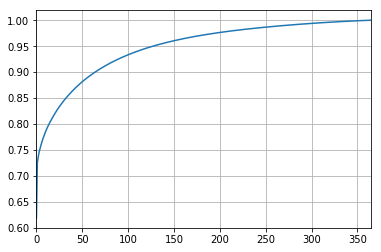

In [32]:
plot(cumsum(D[:])/sum(D))
xlim([0,365])
grid()

(365, 5)


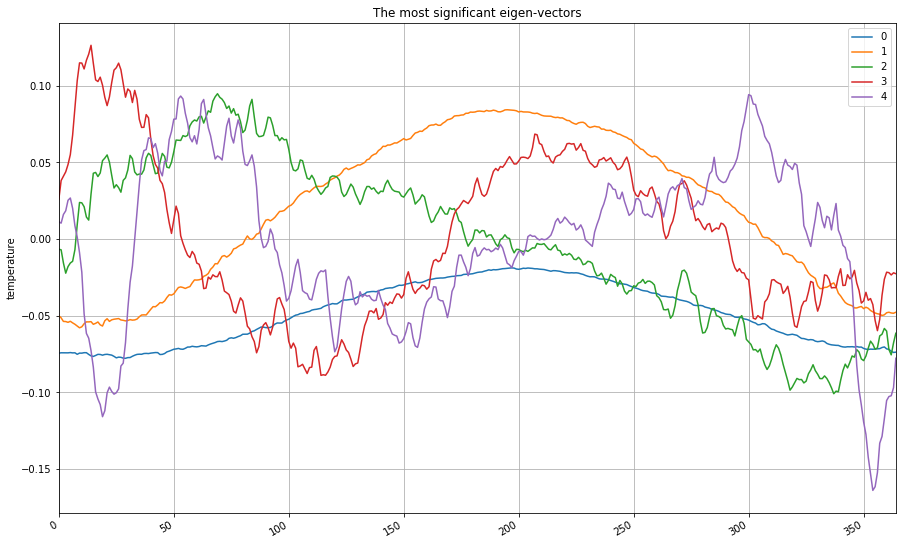

In [33]:
k=5 # number of components to show.
DF_U=pd.DataFrame(U[:,:k])
print shape(DF_U)
YearlyPlots(DF_U,ttl='The most significant eigen-vectors')
legend(range(0,k));

In [34]:
k=5
Eig=np.matrix(U[:,:k])
print 'checking that the norm of the eigenvectors is always 1'
print ['%6.3f,'%np.linalg.norm(U[:,i]) for i in range(k)]
matrix=np.matrix(Dout.loc[:,days])-Mean.transpose()

#replacing nans with zeros
matrix[isnan(matrix)]=0
print shape(Eig),shape(matrix)
Prod=matrix*Eig;
print shape(Prod)

checking that the norm of the eigenvectors is always 1
[' 1.000,', ' 1.000,', ' 1.000,', ' 1.000,', ' 1.000,']
(365, 5) (16217, 365)
(16217, 5)


Insert coefficients for k top eigenvectors into the dataframe **Dout**

In [35]:
for i in range(k-1,-1,-1):
    Ser=pd.Series(np.array(Prod)[:,i],index=Dout.index)
    Dout.insert(4,'V'+str(i),Ser)
Dout.head()

station  year       Mean        Std          V0          V1         V2  \
0  USC00507570  2005   8.531507  10.439819  142.859639  -55.173521  36.693058   
1  CUW00011706  1981  31.321370   1.588618 -314.373311  -22.106199  -8.874564   
2  SZ000002220  1994   2.395342   6.694865  225.906786 -162.724665 -20.281424   
3  RSM00028275  1986   3.972877  14.084255  253.079260   -8.846156  33.543871   
4  USC00488705  1982  12.107945  11.888948   91.449871    0.821546  -1.467498   

          V3         V4  2001-01-01 00:00:00         ...           \
0  -5.200370 -30.828625                  6.7         ...            
1  -3.124461  -7.288273                 30.0         ...            
2   3.413318   9.894655                 -5.8         ...            
3 -26.381500  26.869030                -11.4         ...            
4   3.703292   3.225524                  1.1         ...            

   2001-12-22 00:00:00  2001-12-23 00:00:00  2001-12-24 00:00:00  \
0                 -3.9                 -3.3                 -1.7   
1                 30.0                 31.1                 32.2   
2                -13.0                 -4.8                 -3.4   
3                -31.5                -28.2                -23.6   
4                  5.6                  6.1                  3.3   

   2001-12-25 00:00:00  2001-12-26 00:00:00  2001-12-27 00:00:00  \
0                  3.9                  6.1                  5.0   
1                 31.1                 31.1                 32.2   
2                 -4.4                 -6.6                 -3.4   
3                -25.4                -25.9                -25.9   
4                 -3.9                  0.6                 -2.8   

   2001-12-28 00:00:00  2001-12-29 00:00:00  2001-12-30 00:00:00  \
0                  6.1                  6.1                  4.4   
1                 32.2                 31.1                 31.1   
2                 -1.3                  2.9                 -2.8   
3                -29.5                -26.8                -22.5   
4                 -8.3                 -7.2                 -6.7   

   2001-12-31 00:00:00  
0                  6.1  
1                 31.1  
2                 -7.5  
3                -18.6  
4                 -2.2  

[5 rows x 374 columns]

## Geographic location of stations
Loading the station longitude/latitude and merging it into the Table

In [36]:
!ls

ALL.corrupted.csv           ghcnd-readme.txt
ALL.head.csv                ghcnd-stations.txt
SAMPLE_TMAX.csv             ghcnd-stations_buffered.txt
TMAX.10.csv                 ghcnd-version.txt
TMAX.head.csv               make_covar.raw_256
data-source.txt


In [37]:
!cat ghcnd-readme.txt   # uncomment to read the readme file.

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.00

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

I. DOWNLOAD QUICK START

Start by downloading "ghcnd-stations.txt," which has metadata for all stations.

Then download one of the following TAR files:

  - "ghcnd-all.tar.gz" if you want all of GHCN-Daily, OR
  - "ghcnd-gsn.tar.gz" if you only want the GCOS Surface Network (GSN), OR
  - "ghcnd-hcn.tar.gz" if you only want the U.S. Historical Climatology Network 
    (U.S. HCN).

Then uncompress and untar the contents of the tar file, 
e.g., by using the following Linux command:

tar xzvf ghcnd_xxx.tar.gz

Where "xxx" stands for "all", "hcn", or "gsn" as applicable. The files will be 
extracted into a subdirectory under the directory where the command is issued.

ALTERNATIVELY, if you only need data for one station:

  - Find the station's

In [38]:
# Make all lines be of length 90 to solve problem wilth read_fwf
out=open('ghcnd-stations_buffered.txt','w')
for line in open('ghcnd-stations.txt','r').readlines():
    line=line.rstrip()
    string=line+' '*(90-len(line))+'\n'
    out.write(string)
out.close()

In [39]:
colspecs = [(0, 11), (11, 21), (21, 31), (31, 38),(39,41),(41,72),(72,76),(76,80),(80,86)]
stations = pd.read_fwf('ghcnd-stations_buffered.txt', colspecs=colspecs, header=None, index_col=0,
                       names=['latitude','longitude','elevation','state','name','GSNFLAG','HCNFLAG','WMOID'])

In [40]:
#stations['elevation'][stations['elevation']==-999.9]=0  # decided not to remove -999.9 because this confuses hist

In [41]:
stations.head()

latitude  longitude  elevation state                   name  \
ACW00011604   17.1167   -61.7833       10.1   NaN  ST JOHNS COOLIDGE FLD   
ACW00011647   17.1333   -61.7833       19.2   NaN               ST JOHNS   
AE000041196   25.3330    55.5170       34.0   NaN    SHARJAH INTER. AIRP   
AF000040930   35.3170    69.0170     3366.0   NaN           NORTH-SALANG   
AG000060390   36.7167     3.2500       24.0   NaN     ALGER-DAR EL BEIDA   

            GSNFLAG HCNFLAG    WMOID  
ACW00011604     NaN     NaN      NaN  
ACW00011647     NaN     NaN      NaN  
AE000041196     GSN     NaN  41196.0  
AF000040930     GSN     NaN  40930.0  
AG000060390     GSN     NaN  60390.0

### perform a **JOIN** ###
Join the geographical information into **Dout**, creating a new dataframe called **Djoined**

In [42]:
Djoined=Dout.join(stations,on='station')

In [43]:
Djoined.columns

Index([         u'station',             u'year',             u'Mean',
                    u'Std',               u'V0',               u'V1',
                     u'V2',               u'V3',               u'V4',
       2001-01-01 00:00:00,
       ...
       2001-12-30 00:00:00, 2001-12-31 00:00:00,         u'latitude',
              u'longitude',        u'elevation',            u'state',
                   u'name',          u'GSNFLAG',          u'HCNFLAG',
                  u'WMOID'],
      dtype='object', length=382)

In [44]:
Djoined['AbsLatitude']=abs(Djoined['latitude'].values)

In [45]:
Djoined.loc[:5,['station',u'longitude','latitude',u'elevation',u'AbsLatitude','Mean','Std','V0','V1','V2']]

station  longitude  latitude  elevation  AbsLatitude       Mean  \
0  USC00507570  -154.3164   60.2036       79.2      60.2036   8.531507   
1  CUW00011706   -75.1500   19.9000       16.2      19.9000  31.321370   
2  SZ000002220     9.3500   47.2500     2502.0      47.2500   2.395342   
3  RSM00028275    68.2500   58.1500       44.0      58.1500   3.972877   
4  USC00488705  -104.3567   44.4122     1431.0      44.4122  12.107945   
5  USC00203991   -87.8667   46.4833      468.2      46.4833   8.421170   

         Std          V0          V1         V2  
0  10.439819  142.859639  -55.173521  36.693058  
1   1.588618 -314.373311  -22.106199  -8.874564  
2   6.694865  225.906786 -162.724665 -20.281424  
3  14.084255  253.079260   -8.846156  33.543871  
4  11.888948   91.449871    0.821546  -1.467498  
5  13.209237  166.017832    6.983121 -20.408843

## Looking for significant correlations and dependencies
Each station is no described by a small number of features. We would like to understand the dependencies between these features.

In [46]:
Reduced=Djoined[['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4']]
Reduced.cov()

latitude      elevation        Mean         Std            V0  \
latitude    333.386816     689.886797  -77.688711   31.506288   1787.161898   
elevation   689.886797  387611.225058 -560.502007  174.902051  11399.536421   
Mean        -77.688711    -560.502007   50.380849  -13.720151   -993.347472   
Std          31.506288     174.902051  -13.720151    9.318992    314.999460   
V0         1787.161898   11399.536421 -993.347472  314.999460  20181.402515   
V1          510.756377     108.371690   71.441525   90.911734    -35.995568   
V2          -12.346024    1140.227887    2.256328    2.083452    -52.167755   
V3           39.770731    2575.519048    0.110943   -2.972772      1.732165   
V4          -10.697068     871.637363    1.978315   -0.658043    -43.322627   

                    V1           V2           V3          V4  
latitude    510.756377   -12.346024    39.770731  -10.697068  
elevation   108.371690  1140.227887  2575.519048  871.637363  
Mean         71.441525     2.256328     0.110943    1.978315  
Std          90.911734     2.083452    -2.972772   -0.658043  
V0          -35.995568   -52.167755     1.732165  -43.322627  
V1         3495.453407    -1.583317    -4.106764   -1.565305  
V2           -1.583317   393.616027     4.180096    6.572526  
V3           -4.106764     4.180096   323.144432   -1.170630  
V4           -1.565305     6.572526    -1.170630  237.811465

<span style="color:red"> The correlations between different $V_i$ components should be zero, which it isn't.
Is this due to numerical roundoff errors? Are the correlations statistically significant for this sample size? </span>

In [47]:
Reduced.corr()

latitude  elevation      Mean       Std        V0        V1  \
latitude   1.000000   0.060688 -0.599447  0.565247  0.688992  0.473138   
elevation  0.060688   1.000000 -0.126837  0.092026  0.128888  0.002944   
Mean      -0.599447  -0.126837  1.000000 -0.633201 -0.985128  0.170242   
Std        0.565247   0.092026 -0.633201  1.000000  0.726356  0.503714   
V0         0.688992   0.128888 -0.985128  0.726356  1.000000 -0.004286   
V1         0.473138   0.002944  0.170242  0.503714 -0.004286  1.000000   
V2        -0.034081   0.092312  0.016023  0.034400 -0.018509 -0.001350   
V3         0.121169   0.230127  0.000869 -0.054172  0.000678 -0.003864   
V4        -0.037990   0.090786  0.018074 -0.013978 -0.019775 -0.001717   

                 V2        V3        V4  
latitude  -0.034081  0.121169 -0.037990  
elevation  0.092312  0.230127  0.090786  
Mean       0.016023  0.000869  0.018074  
Std        0.034400 -0.054172 -0.013978  
V0        -0.018509  0.000678 -0.019775  
V1        -0.001350 -0.003864 -0.001717  
V2         1.000000  0.011721  0.021482  
V3         0.011721  1.000000 -0.004223  
V4         0.021482 -0.004223  1.000000

In [48]:
# Choosing significance threshold so that none of the correlations between the Vi-s are significant.
abs(Reduced.corr())>0.2

latitude  elevation   Mean    Std     V0     V1     V2     V3  \
latitude       True      False   True   True   True   True  False  False   
elevation     False       True  False  False  False  False  False   True   
Mean           True      False   True   True   True  False  False  False   
Std            True      False   True   True   True   True  False  False   
V0             True      False   True   True   True  False  False  False   
V1             True      False  False   True  False   True  False  False   
V2            False      False  False  False  False  False   True  False   
V3            False       True  False  False  False  False  False   True   
V4            False      False  False  False  False  False  False  False   

              V4  
latitude   False  
elevation  False  
Mean       False  
Std        False  
V0         False  
V1         False  
V2         False  
V3         False  
V4          True

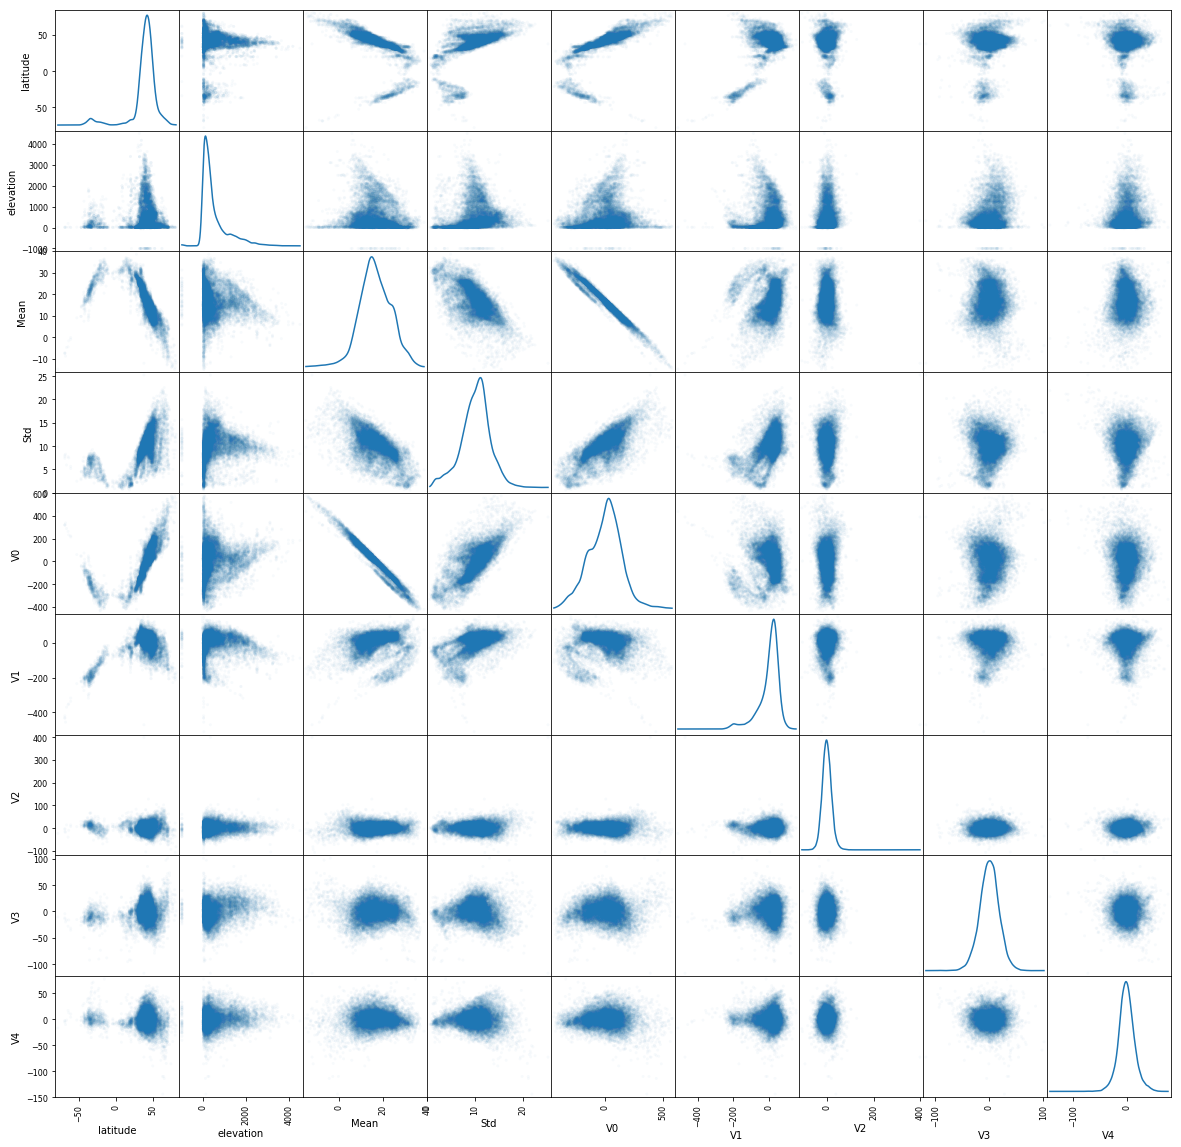

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(Reduced, alpha=0.03, figsize=(20, 20), diagonal='kde');

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


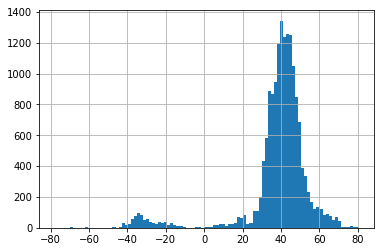

In [50]:
X='latitude'
Djoined.ix[:,X].hist(bins=100);

Text(0,0.5,u'V0')

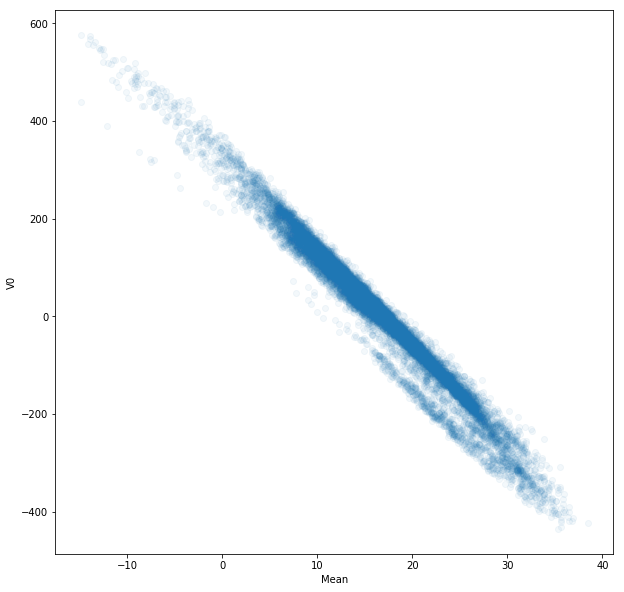

In [51]:
X='Mean';Y='V0'
figure(figsize=(10,10))
scatter(Djoined.loc[:,X],Djoined.loc[:,Y],alpha=0.05)
xlabel(X)
ylabel(Y)

In [52]:
#checking for an anomaly in the elevations of stations
Djoined[['station','elevation']][Djoined['elevation']<-500].head()

station  elevation
1414  RSM00023707     -999.9
1795  USC00107878     -999.9
1812  USC00146746     -999.9
1903  BL000085141     -999.9
2358  USC00301010     -999.9

In [53]:
!grep ASN00010865 ghcnd-stations.txt

ASN00010865 -34.0333  117.2667 -999.9    LUMEAH                                      


## Plotting maps

## ipyleaflet
* [leaflet](http://leafletjs.com/) is a javascript library for rendering maps.

* [ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a jupyter notebook extension that allows one to use leaflet inside jupyter notebooks.

### Installation

#### Using pip:

```bash
pip install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet
```

#### Using Conda:
```bash
conda install -c conda-forge ipyleaflet
```

In [55]:
import random

lons=stations.loc[:,'longitude'].values
lats=stations.loc[:,'latitude'].values
lonmin=-120;lonmax=-70;latsmin=25;latsmax=45;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
station_names=station_names=stations.index.values[select]
lons=lons[select]
lats=lats[select]

from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

m = Map(default_tiles=TileLayer(opacity=1.0), center=[35, -95], zoom=4)

for _long, _lat in random.sample(zip(lons,lats), 100):
    c = Circle(location=(_lat,_long), radius=1, color='#F00', fill_color='#F00',
               opacity=1, fill_opacity=1)
    m += c

parallels = np.arange(-80,81,20.)    
for parallel in parallels:
    pl = Polyline(locations=[[parallel,-180],[parallel,180]], color='#000', weight=1)
    m += pl

meridians = np.arange(-180.,181.,60.)
for meridian in meridians:
    pl = Polyline(locations=[[-90, meridian],[90,meridian]], color='#000', weight=1)
    m += pl
    
m

To get to these coordinate on Google Maps, type the latitude and longitude in decimal in the search box or use:
https://www.google.com/maps/place/72%C2%B018'00.0%22S+170%C2%B013'00.1%22E/@-72.3,170.216694,17z/data=!3m1!4b1!4m2!3m1!1s0x0:0x0

If you try to plot more/all stations in the world, you could run into IOpub datarate exceeded error. To fix that you can either change the jupyter config or use command "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10" while starting the notebook.

For reference:
* https://github.com/jupyter/notebook/issues/2287
* https://media.readthedocs.org/pdf/jupyter-notebook/latest/jupyter-notebook.pdf

<span style="color:red">HW questions</span>

1. Waiting for somebody to write a script that will do that automatically from python
2. Can you create a map where the denity of points is represented as a density map (topographical map)?
3. Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?


### Reconstruction ###

In [56]:
KMean=np.array([Mean])

k=10
Keig=Eig[:,:k]
Kprod=Prod[:,:k]
Recon=pd.DataFrame(Kprod*Keig.transpose() +KMean)
Recon.columns=days_index

In [57]:
print shape(Djoined.loc[i,days])
print shape(Recon.loc[i,days])

shape(Djoined),shape(Recon)

(365,)
(365,)


((16217, 383), (16217, 365))

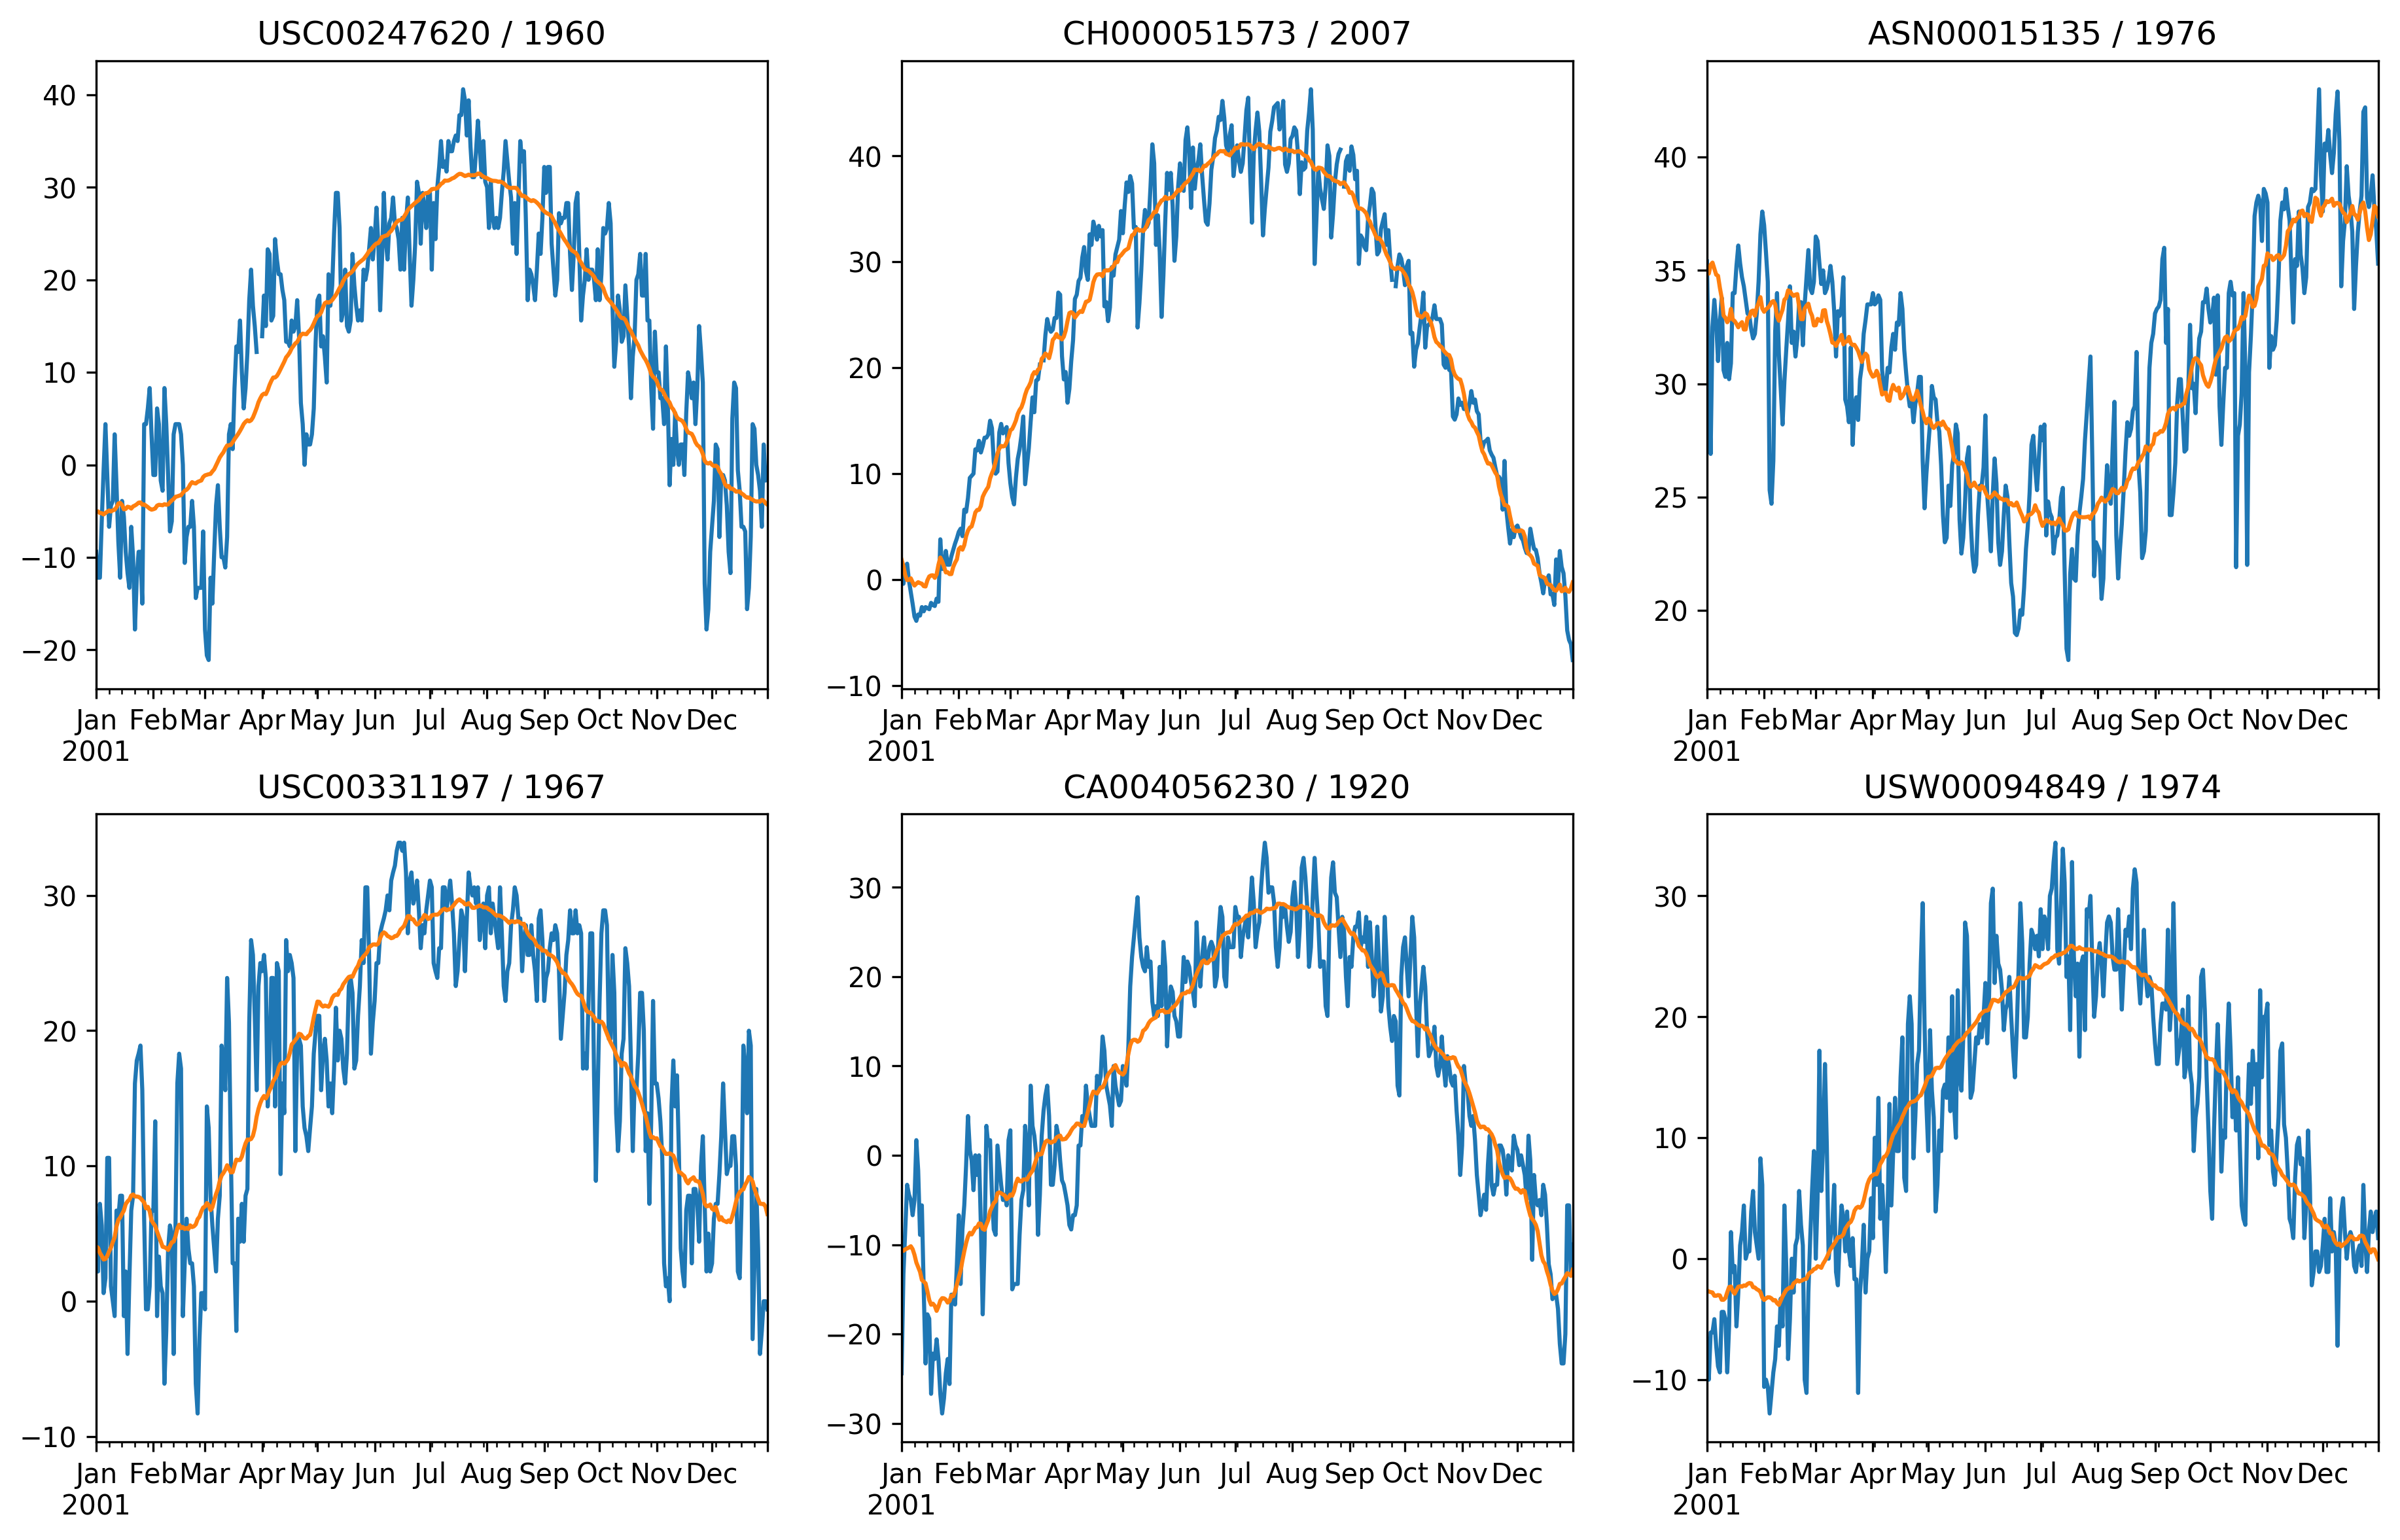

In [67]:
def plot_reconstructions(selection,rows=2,columns=7,size=3):
    plt.figure(figsize=(columns*size,rows*size),dpi=300)
    j=1;
    for i in selection:
        subplot(rows,columns,j); 
        j += 1; 
        if j>=rows*columns: 
            break
        (Djoined.loc[i,days]).plot()
        (Recon.loc[i,days]).plot()
        title(Djoined.loc[i,'station']+' / '+str(Djoined.loc[i,'year']))
plot_reconstructions(range(2000,2006),rows=10,columns=3,size=5)

Observe in the reconstructions below that the blue line fills in (extrapolation/interpolation) the places where the measurements are not available. It also reduces the fluctuations in the relative to the original line. Recall the we are using the k top eigenvectors which explain about 88% of the variance.

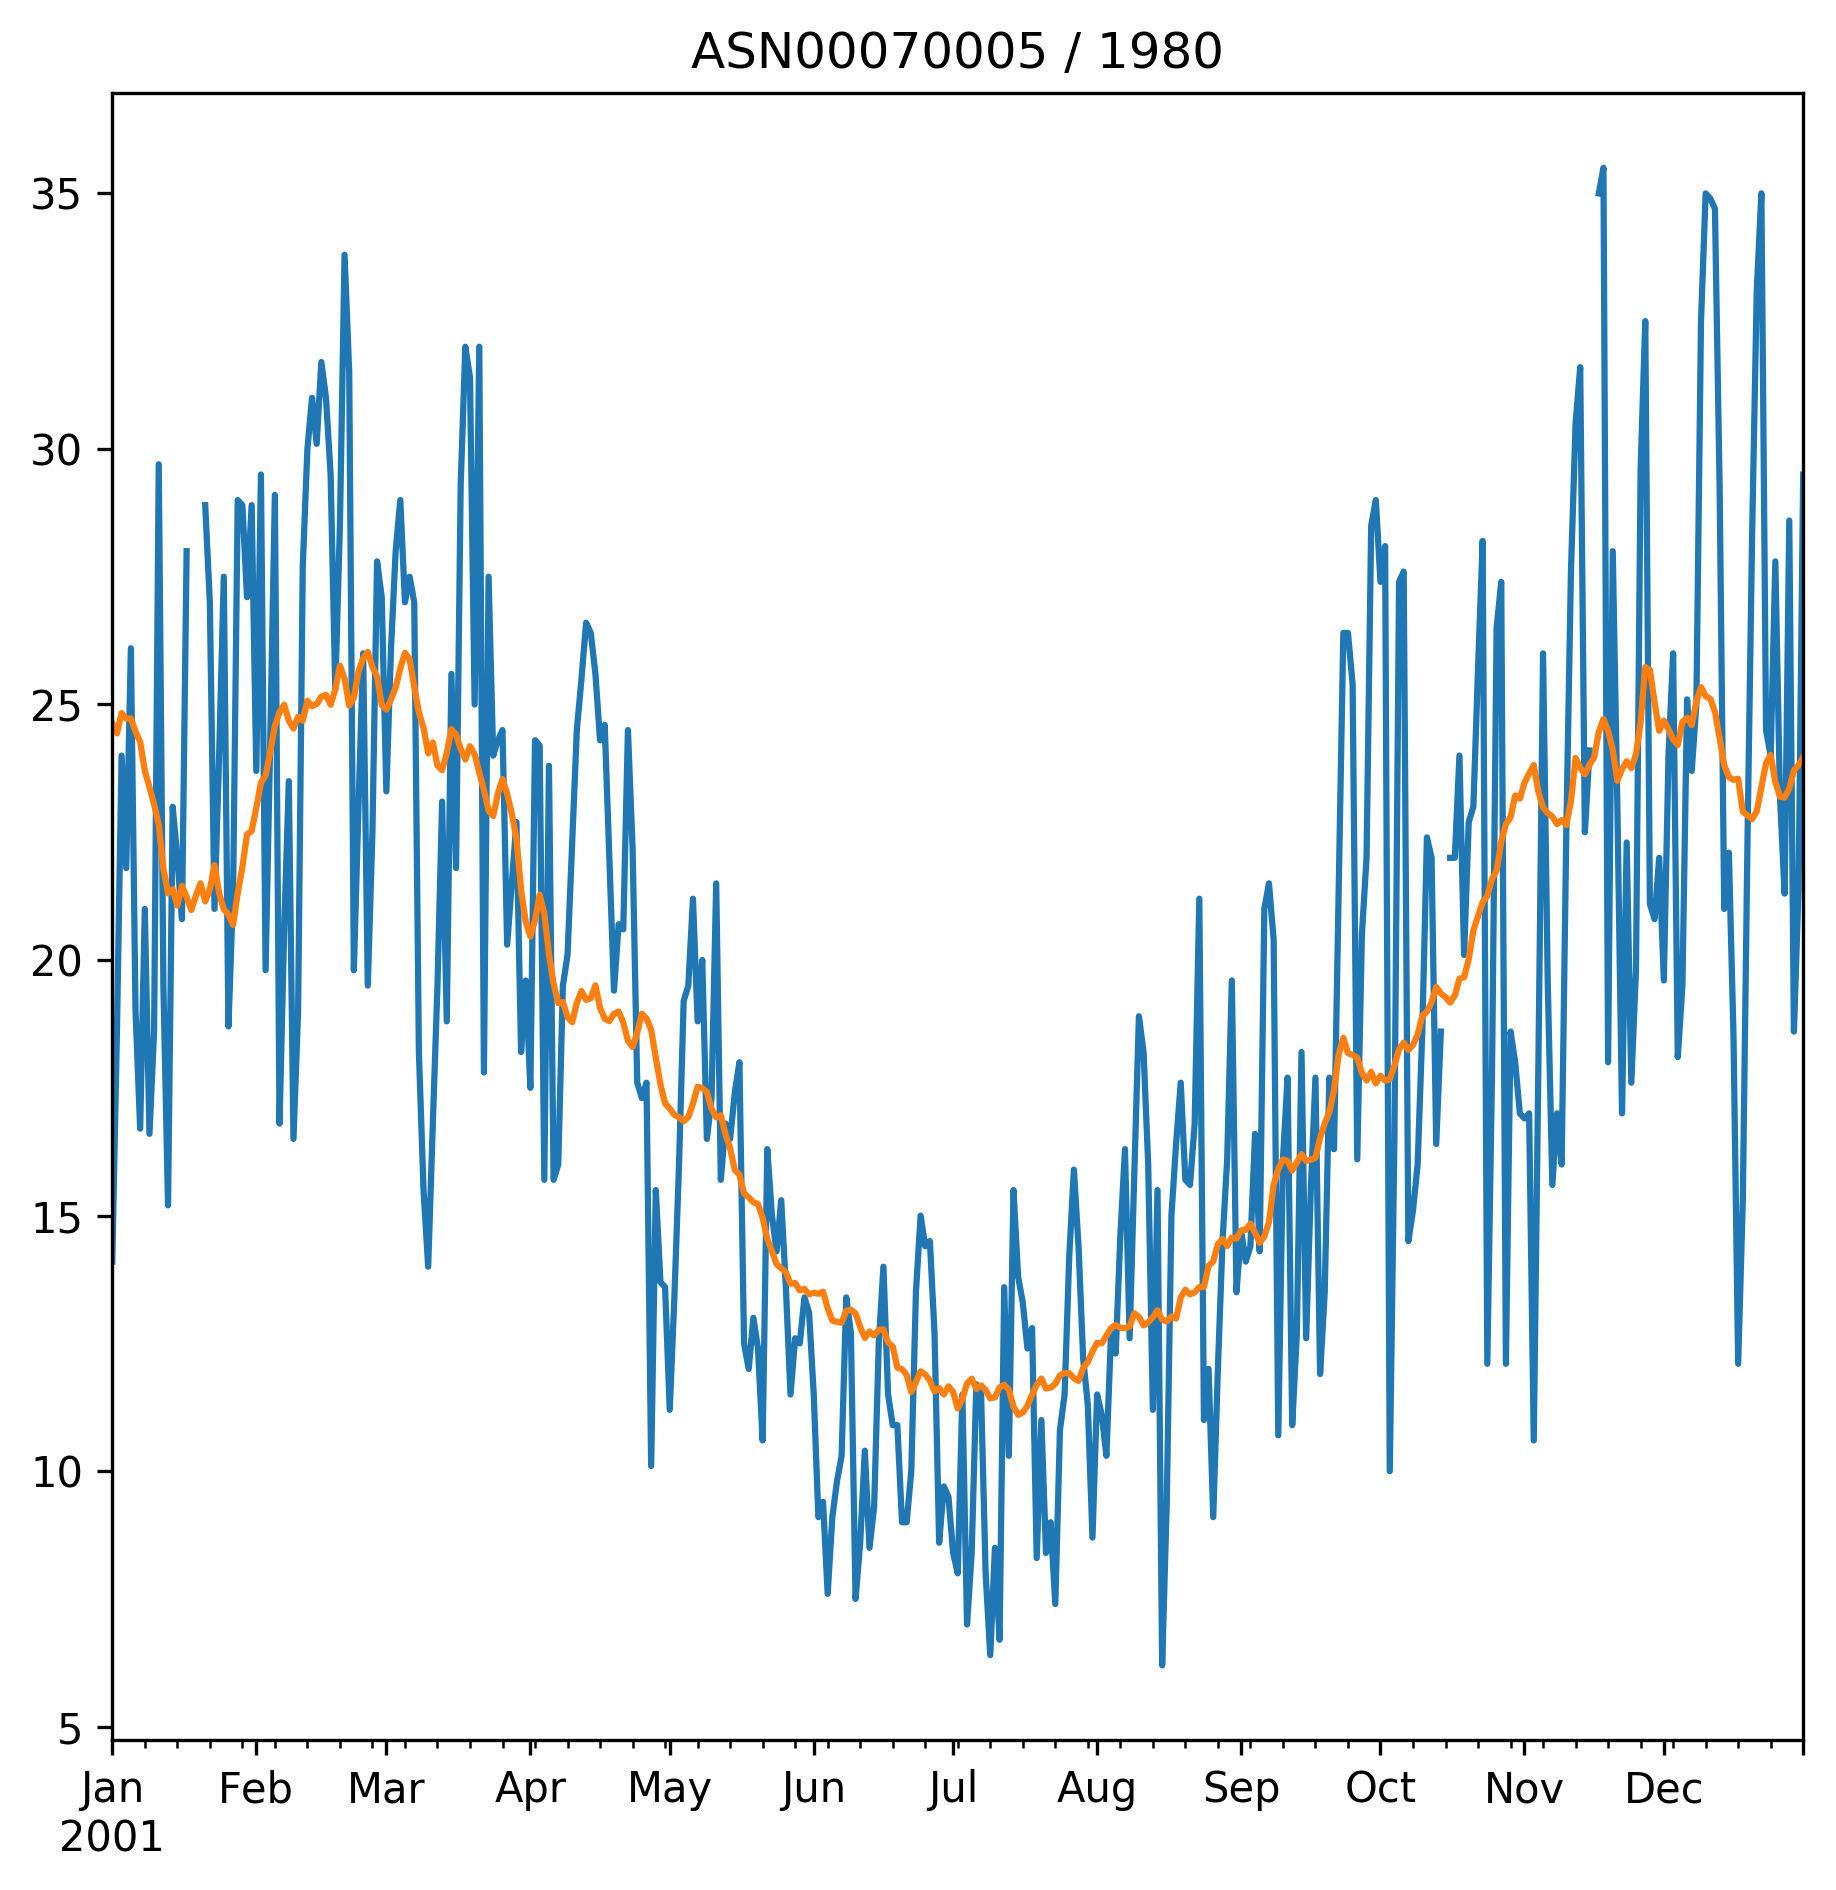

In [59]:
plot_reconstructions([2012],rows=2,columns=2,size=8)

<span style="color:red"> Check how the approximations change/improve as you increase the number of coefficients</span>

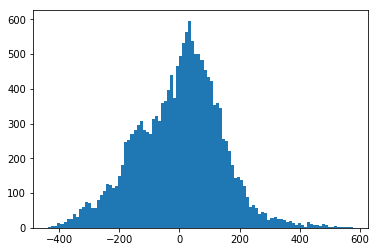

In [60]:
hist(Djoined.ix[:,'V0'],bins=100);

(822,)

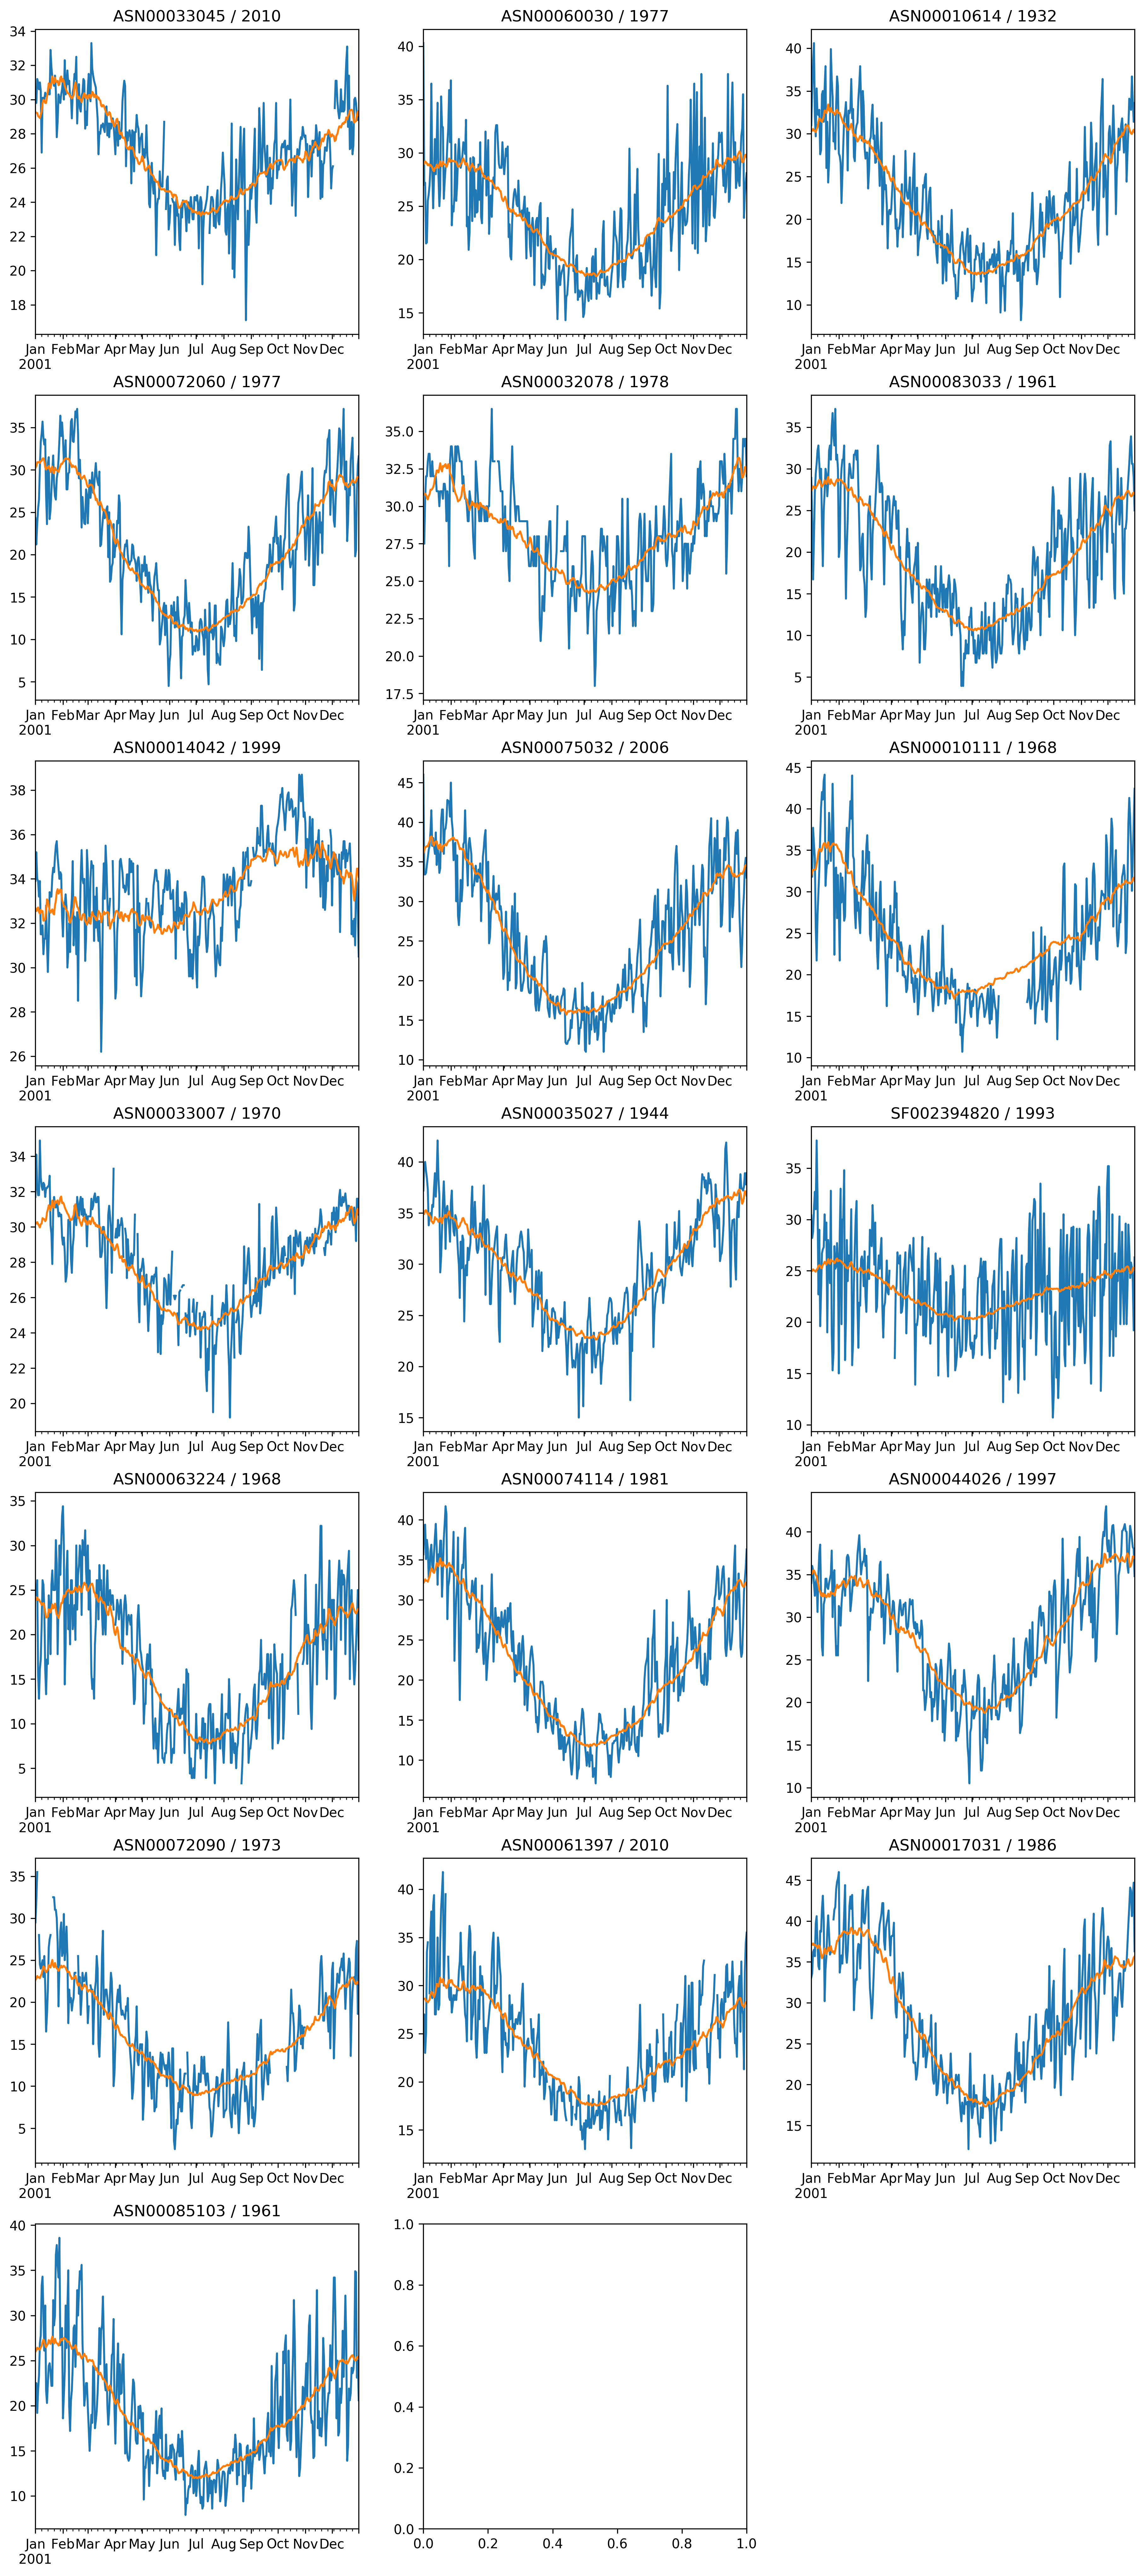

In [68]:
selection= [i for i in range(shape(Djoined)[0]) if Djoined.loc[i,'latitude']<-10]
plot_reconstructions(selection,rows=7,columns=3, size=5)
shape(selection)

<span style="color:red">Can you reduce the reconstruction error (using a fixed number of eigenvectors) by splitting the stations according to region (for example country, state, latitudal range). Note that having a regions with very few readings defeats the purpose.

In [62]:
shape(np.array([Mean]).transpose())

(365, 1)